In [1]:
%load_ext autoreload
%autoreload 2
import risk_kit as rk
ind=rk.get_ind_returns()
er=rk.annualize_rets(ind["2013":"2017"],12)
cov=ind["2013":"2017"].cov()

In [2]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
def msr( riskfree_rate,er,cov):
    """ 
    target_ret->W
    """
    n=er.shape[0]
    init_guess = np.repeat(1/n,n)
    bounds = ((0.0,1.0),)*n
    weights_sum_to_1={
        'type':'eq',
        'fun': lambda weights: np.sum(weights)-1
    }
    def neg_sharpe_ratio(weights,riskfree_rate,er,cov):
        """ 
        Retirns the negative of the sharpe ratio of given weights
        """
        r=rk.portfolio_return(weights,er)
        vol=rk.portfolio_vol(weights,cov)
        return -(r-riskfree_rate)/vol
    results=minimize(neg_sharpe_ratio,init_guess,args=(riskfree_rate,er,cov,),method="SLSQP",
                     options={'disp':False},
                     constraints=(weights_sum_to_1),
                     bounds=bounds
                     )
    return results.x

[0.00000000e+00 2.46766193e-01 5.10271824e-02 0.00000000e+00
 7.40252169e-15 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.78642684e-01 2.76402329e-15 1.22254265e-14
 0.00000000e+00 9.77663701e-15 8.90232784e-16 2.45053891e-01
 1.07379172e-14 6.43678577e-14 6.54812461e-15 0.00000000e+00
 0.00000000e+00 1.78510050e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


AttributeError: 'NoneType' object has no attribute 'plot'

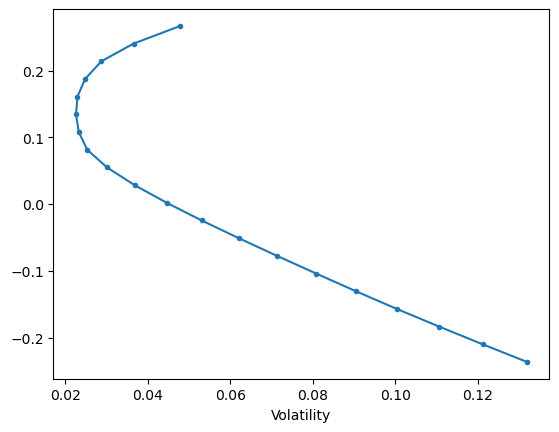

In [4]:
ax=rk.plot_ef(20,er,cov)
rf=0.1
w_msr=msr(rf,er,cov)
print(w_msr)
r_msr=rk.portfolio_return(w_msr,er)
vol_msr=rk.portfolio_vol(w_msr,cov)
# Add CML
cml_x=[0,vol_msr]
cml_y=[rf,r_msr]
ax.plot(cml_x,cml_y,color="green",marker="o",linestyle="dashed")

<AxesSubplot: xlabel='Volatility'>

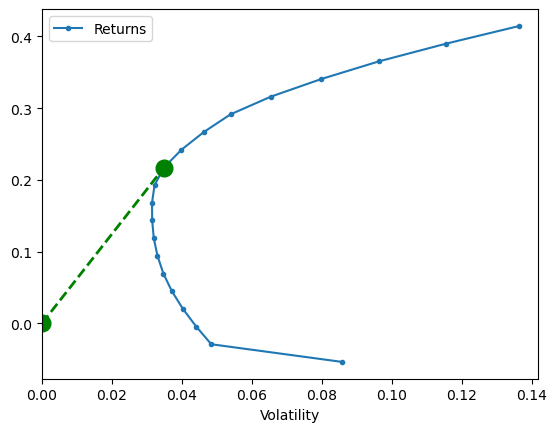

In [ ]:
rk.plot_ef(20,er,cov,show_cml=True)